A STUDY OF ROMEO AND JULIET IN ORIGINAL AND TRANSLATIONS
ALL TEXTS TAKEN FROM https://www.gutenberg.org/

In [2]:
from collections import Counter

In [3]:
text = "List's a simple: Test tring's BLA, BLA to test counting words."

In [4]:
def count_words(text):
    '''
    Count the number of times each word occurs in text(str).
    Return dictionary: keys == unique words, values == word counts.
    Skips punctuation.
    '''
    text = text.lower()
    words = text.split(" ")
    words = [word.strip(".,!:()[]") for word in words] 
    words = [word.replace("'s","") for word in words]
    word_counts = {}
    word_counts = Counter(words)
    return word_counts

# Counter replaces a simple function as such:
# for word in text.split(" "):
#     if word in word_counts:
#         word_counts[word] += 1
#     else:
#         word_counts[word] = 1 

In [5]:
count_words(text)

Counter({'list': 1,
         'a': 1,
         'simple': 1,
         'test': 2,
         'tring': 1,
         'bla': 2,
         'to': 1,
         'counting': 1,
         'words': 1})

In [6]:
import os

In [7]:
def read_book(title_path):
    '''
    Read book and return as a string without \n \r chars.
    '''
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

In [8]:
def read_book_russian(title_path):
    '''
    Read book and return as a string without \n \r chars.
    '''
    with open(title_path, encoding='windows-1251', mode='r') as current_file:
        text = current_file.read()
        text = text.replace("\n","")
    return text

In [9]:
text = read_book("/Users/polina_zemlicka/Documents/BOOKS/R&J/ENGLISH.txt")

In [10]:
len(text)

136320

LET'S EXPLORE SOMEDETAILS ABOUT THE TEXT

In [11]:
def word_stats(word_counts):
    '''
    Returns number of unique words and word frequencies.
    '''
    num_unique = len(word_counts)
    counts =  word_counts.values()
    return (num_unique, counts)

In [12]:
text = read_book("/Users/polina_zemlicka/Documents/BOOKS/R&J/ENGLISH.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)

In [13]:
# unique words 
num_unique

6491

In [14]:
# total words
sum(counts)

21928

WOULD THE NUMBER OF WORDS AND TOTAL WORD COUNT BE DIFFERENT IN TRANSLATIONS?

In [15]:
text = read_book("/Users/polina_zemlicka/Documents/BOOKS/R&J/GERMAN.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)

In [16]:
# unique words in German 
num_unique

6563

In [17]:
# total words in German 
sum(counts)

17869

In [18]:
text = read_book("/Users/polina_zemlicka/Documents/BOOKS/R&J/FRENCH.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)

In [19]:
# unique words in French  
num_unique

8653

In [20]:
# total words in French 
sum(counts)

28404

WOW!
THIS IS GETTING INTERESTING 
LET'S NOW LOOP OVER SEVERAL TRANSLATIONS, 
STORE DATA AND VISUALIZE IT IN A GRAPH.

Make sure if you are taking just the texts - no foreword, etc

In [21]:
# languages = ['ENGLISH', 'GERMAN', 'FRENCH', 'POLISH']

In [22]:
# ENGLISH

text = read_book("/Users/polina_zemlicka/Documents/BOOKS//R&J/ENGLISH.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)

In [23]:
num_unique

6491

In [24]:
sum(counts)

21928

In [25]:
#text

NOW LETS LOOP OVER LANGUAGES, PREFORMING CLEAN UP AS WE GO.
THEN STORE RESULTS INTO A PANDAS TABLE

In [26]:
import pandas as pd

In [27]:
book_dir = "/Users/polina_zemlicka/Documents/BOOKS/R&J"
# book_dir
# if you keep getting a '.DS_Store' file in bok_dir and cannpt remove it, use:
# find . -name "*.DS_Store" -type f -delete
# in Terminal

In [28]:
os.listdir(book_dir)

['GERMAN.txt', 'RUSSIAN.txt', 'FRENCH.txt', 'ENGLISH.txt', 'POLISH.txt']

In [29]:
stats = pd.DataFrame(columns = ("language","length","unique words"))
title_num = 1

for file in os.listdir(book_dir):
    
    input_file = book_dir + "/" + file
    if file == 'RUSSIAN.txt':
        text = read_book_russian(input_file)
    else:
        text = read_book(input_file)
  
    (num_unique, counts) = word_stats(count_words(text))
    stats.loc[title_num] = file.replace(".txt",""), sum(counts), num_unique
    title_num += 1   

In [30]:
stats

,language,length,unique words
1,GERMAN,17869,6563
2,RUSSIAN,16678,7684
3,FRENCH,28404,8653
4,ENGLISH,21928,6491
5,POLISH,20469,8320


LET'S VISUALIZE


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Romeo and Juliet')

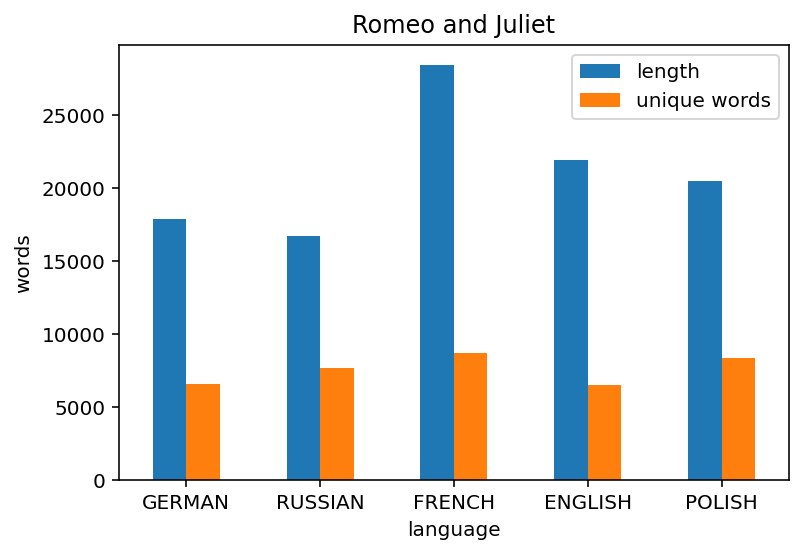

In [32]:
ax = stats.plot.bar(x='language',rot=0)
plt.xlabel('language', fontsize=10)
plt.ylabel('words', fontsize=10)
plt.title('Romeo and Juliet')

LET'S LOOK AT CHARACTERS AND HOW MANY LINES THEY HAVE IN THE ENGLISH ORIGINAL.
 

In [33]:
text = read_book("/Users/polina_zemlicka/Documents/BOOKS//R&J/ENGLISH.txt")

In [34]:
import re

In [66]:
def eng_characters(text):
    '''
    def takes text of the play and return all character with a number 
    of times they speak
    '''
    characters = {}
    ind = text.find("ESCALUS")
    results =  re.findall(r"([A-Z]+\s?[A-Z]+[^a-z0-9\W])",text[ind:].replace("CAPULET’S COUSIN", "CAPULET COUSIN"))
    for entry in results:
        if "SCENE" not in entry:
            if "ACT" not in entry:
                if entry in characters:
                    characters[entry] += 1
                else:
                    characters[entry] = 1
    return (characters)

In [68]:
rj_chars = eng_characters(text)

In [74]:
sorted(rj_chars.items(), key=lambda x:x[1],reverse = True)

[('ROMEO', 164),
 ('JULIET', 119),
 ('NURSE', 91),
 ('BENVOLIO', 64),
 ('MERCUTIO', 63),
 ('FRIAR LAWRENCE', 56),
 ('CAPULET', 51),
 ('LADY CAPULET', 46),
 ('PARIS', 24),
 ('SAMPSON', 21),
 ('TYBALT', 18),
 ('GREGORY', 16),
 ('PRINCE', 16),
 ('PETER', 14),
 ('BALTHASAR', 13),
 ('MONTAGUE', 11),
 ('SERVANT', 10),
 ('FIRST MUSICIAN', 10),
 ('ABRAM', 6),
 ('SECOND SERVANT', 6),
 ('FIRST WATCH', 6),
 ('FRIAR JOHN', 5),
 ('FIRST SERVANT', 4),
 ('APOTHECARY', 4),
 ('PAGE', 4),
 ('LADY MONTAGUE', 3),
 ('CAPULET COUSIN', 3),
 ('CHORUS', 3),
 ('FIRST CITIZEN', 3),
 ('SECOND MUSICIAN', 3),
 ('ESCALUS', 1),
 ('THE PROLOGUE', 1),
 ('THIRD MUSICIAN', 1),
 ('SECOND WATCH', 1),
 ('THIRD WATCH', 1)]

HMMM ROMEO STFU! 